# The two-sites Hubbard model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import timeit
from sklearn.linear_model import LinearRegression

In [2]:
from qutip import tensor, destroy, qeye

def get_energies_2sHubbard_traditional(N, U = 1.):
    """
    """
    aL = tensor(destroy(N), qeye(N))
    aR = tensor(qeye(N), destroy(N))
    num_L = aL.dag() * aL
    num_R = aR.dag() * aR

    H = -(aL.dag() * aR + aR.dag() * aL) + U * (num_L * (num_L - 1) + num_R * (num_R - 1))
    
    return H.eigenenergies()

In [3]:
N_traditional = 2 ** np.array([3, 4, 5])##5, 6, 7, 8])



time_get_energies_2sHubbard_traditional = [
    timeit.timeit(
        f"get_energies_2sHubbard_traditional({_})", globals=globals(), number=5
    )
    for _ in N_traditional
]

time_get_energies_2sHubbard_traditional

[0.008304583000000143, 0.3519478330000001, 8.024229084]

In [4]:
def Cantor(x, y):
    return (x + y) * (x + y + 1) / 2 + y

def get_energies_2sHubbard_Cantor(N, U = 1.):
    """
    """
    z_max = Cantor(N, N)
    z = np.arange(0, z_max)

    w = np.floor(0.5 * (np.sqrt(8 * z + 1) - 1))
    y = z - w * (w + 1) / 2
    x = w - y

    nL = x.astype(int)
    nR = y.astype(int)
    
    return eigh_tridiagonal(
        U * (nL * (nL - 1) + nR * (nR - 1)), -np.sqrt((nL + 1) * nR)[1::],
        eigvals_only = True,
        #select='i',
        #select_range=(0, N ** 2)
    )

In [5]:
N_Cantor = 2 ** np.array([3, 4, 5, 6, 7, ])

time_get_energies_2sHubbard_Cantor = [
    timeit.timeit(
        f"get_energies_2sHubbard_Cantor({_})", globals=globals(), number=5
    )
    for _ in N_Cantor
]

In [6]:
time_get_energies_2sHubbard_Cantor

[0.0006526250000007394,
 0.0037174589999988683,
 0.0475517080000003,
 0.5417212500000002,
 8.720416708999998]

Cantor scaling  [3.45988004]
Traditinal scaling  [4.95811968]


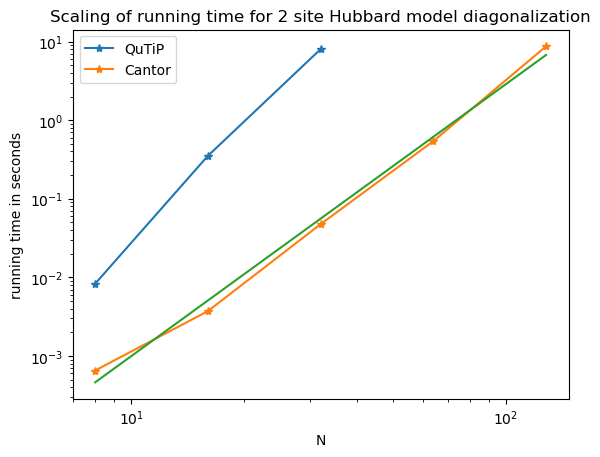

In [7]:
Cantor_scaling = LinearRegression()
Cantor_scaling.fit(np.log2(N_Cantor).reshape(-1, 1), np.log2(time_get_energies_2sHubbard_Cantor))

Traditional_scaling = LinearRegression()
Traditional_scaling.fit(np.log2(N_traditional).reshape(-1, 1), np.log2(time_get_energies_2sHubbard_traditional))

n = np.linspace(N_Cantor.min(), N_Cantor.max(), 100)



plt.title("Scaling of running time for 2 site Hubbard model diagonalization")
plt.loglog(N_traditional, time_get_energies_2sHubbard_traditional, "*-", label="QuTiP", base=2)

plt.loglog(N_Cantor, time_get_energies_2sHubbard_Cantor, "*-", label="Cantor", base=2)
plt.loglog(n, 2 ** Cantor_scaling.predict(np.log2(n).reshape(-1, 1)))
print("Cantor scaling ", Cantor_scaling.coef_)
print("Traditinal scaling ", Traditional_scaling.coef_)


plt.xlabel("N")
plt.ylabel("running time in seconds")
plt.legend()
plt.show()

In [8]:
(N ** 2) ** 2

NameError: name 'N' is not defined